 Найти данные размера хотя бы 10000, на которых можно решить задачу классификации или регрессии.
 

Для решения задачи используется датасет "Данные о клиентах магазина"

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Customers.csv', sep=';')

data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-5),Profession,Work Experience,Family Size
0,1,Male,21,35000,5,Engineer,3,3
1,2,Female,23,84000,5,Healthcare,1,3
2,3,Female,35,93000,5,Healthcare,4,4
3,4,Female,35,62000,5,Artist,0,1
4,5,Female,46,42000,5,Artist,13,2


Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.

In [274]:
data.dtypes

CustomerID               int64
Gender                  object
Age                      int64
Annual Income ($)        int64
Spending Score (1-5)     int64
Profession              object
Work Experience          int64
Family Size              int64
dtype: object

Все признаки числовые, кроме признаков "пол" и "профессия"


In [275]:
data.isnull().sum()

CustomerID              0
Gender                  0
Age                     0
Annual Income ($)       0
Spending Score (1-5)    0
Profession              0
Work Experience         0
Family Size             0
dtype: int64

Пропусков в данных нет

Переведем не числовые признаки в числовые

In [276]:
data['Profession'].unique()

array(['Engineer', 'Healthcare', 'Artist', 'Homemaker', 'Executive',
       'Lawyer', 'Marketing', 'Entertainment', 'Doctor'], dtype=object)

In [277]:
data['Profession'] = data['Profession'].map({'Healthcare': 0, 'Engineer': 1, 'Lawyer': 2, 'Entertainment': 3, 'Artist': 4, 'Executive':5,'Doctor':6,'Homemaker':7,'Marketing':8})

In [278]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

In [279]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-5),Profession,Work Experience,Family Size
0,1,0,21,35000,5,1,3,3
1,2,1,23,84000,5,0,1,3
2,3,1,35,93000,5,0,4,4
3,4,1,35,62000,5,4,0,1
4,5,1,46,42000,5,4,13,2


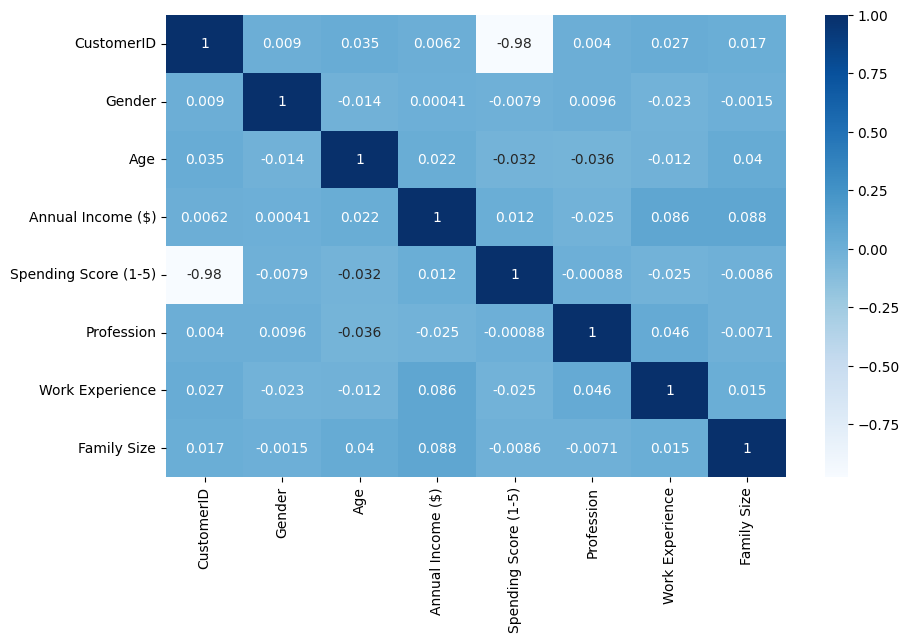

In [280]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

In [281]:
data.groupby('Profession').mean()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-5),Work Experience,Family Size
Profession,,,,,,,
0,5438.356040,0.584886,47.564130,113751.946780,3.118680,4.072379,3.932411
1,5580.323383,0.572139,55.405970,112951.505473,3.052736,3.982090,3.577114
2,5731.369458,0.615764,47.779557,112316.700739,2.988916,3.633005,3.708128
3,5292.736965,0.568872,50.871595,110940.697276,3.193774,3.480934,3.920623
4,5359.700237,0.616114,49.047393,109539.584716,3.159953,4.184242,3.691055
5,5510.285199,0.570397,46.269555,114150.765343,3.096270,4.196149,3.957882
6,5431.525627,0.559433,47.796074,112914.184297,3.130862,4.272628,3.731734
7,5698.510264,0.636364,44.733138,109151.695015,3.017595,6.008798,4.052786
8,5734.880342,0.608974,45.649573,107367.991453,3.002137,4.130342,3.711538


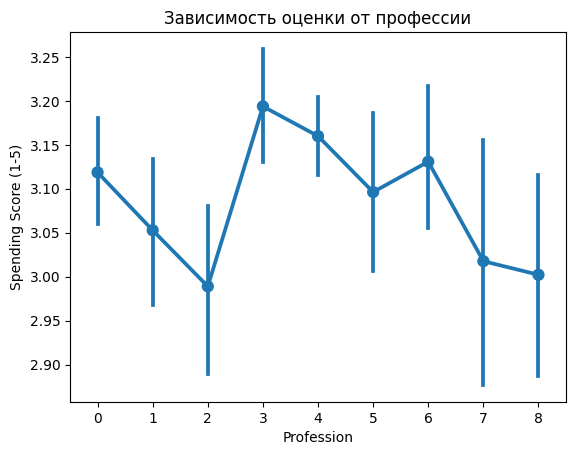

In [283]:
sns.pointplot(y="Spending Score (1-5)", x="Profession", data=data)
plt.title('Зависимость оценки от профессии')
plt.show()

Лучшие показатели у людей с профессиями "аниматор" и "артист"

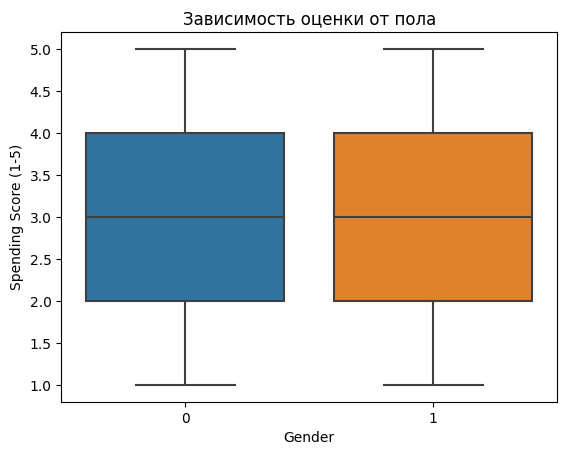

In [284]:
sns.boxplot(x="Gender", y="Spending Score (1-5)", data=data)
plt.title('Зависимость оценки от пола')
plt.show()

Самостоятельно реализуйте алгоритмы Bagging и AdaBoost, которые позволят обучить ансамбли каких-то простых моделей, например деревьев принятия решений.

Bagging

In [285]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import numpy as np
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

class Bagging:
    def __init__(self, n_estimators=10, max_samples=0.5):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.estimators = []
        
    def fit(self, X, y):
        n_samples = X.shape[0]
        n_bag_samples = int(n_samples * self.max_samples)
        
        for _ in range(self.n_estimators):
            X_bag, y_bag = resample(X, y, n_samples=n_bag_samples)
            tree = DecisionTreeClassifier()
            tree.fit(X_bag, y_bag)
            self.estimators.append(tree)
    
    def predict(self, X):
        y_preds = []
        for estimator in self.estimators:
            y_pred = estimator.predict(X)
            y_preds.append(y_pred)
        y_preds = np.array(y_preds)
        return np.mean(y_preds, axis=0).round().astype(int)

4. Обучение ансамблей для простых моделей, используя свои две реализации, а также реализации из sklearn (Bagging, Random Forest, AdaBoost, Gradient Tree Boosting, Histogram-Based Gradient Boosting).

(+3*)Для подбора гиперпараметров использовать фреймворк Optuna.


In [286]:
from sklearn.model_selection import train_test_split

X = data.drop('Spending Score (1-5)', axis=1).values
y = data['Spending Score (1-5)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_trials = 25


Обучение собственной реализации bagging

In [287]:
from sklearn.metrics import accuracy_score
import time
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    estimators = trial.suggest_int('Estimators number', 1, 25)
    samples = trial.suggest_int('Samples number', 1, 10)
    
    bagging = Bagging(estimators, samples)
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_best = study.best_trial.params['Estimators number']
samples_best = study.best_trial.params['Samples number']

model = Bagging(estimators_best, samples_best)

start = time.time()
model.fit(X_train, y_train)
end = time.time()

bagging_pred = model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_time = end - start

print(f'Model accuracy: {bagging_accuracy}')
print(f'Model time: {bagging_time}')

Best parameters: {'Estimators number': 6, 'Samples number': 7}
Best accuracy: 1.0
Model accuracy: 1.0
Model time: 0.23021197319030762


AdaBoost

In [288]:
class adaboost:
    def __init__(self, estimators_number = 10, learning_rate = 0.5):
        self.estimators_number = estimators_number
        self.learning_rate = learning_rate
        
        self.estimators = []
        self.weights = np.zeros(estimators_number)
    # Инициализируем веса
    def fit(self, X, y):
        n_samples = len(X)
        w = np.ones(n_samples) / n_samples
    
        for i in range( self.estimators_number):
            clf = DecisionTreeClassifier(max_depth=1)
            clf.fit(X, y, sample_weight=w)

            error, incorrect = self.calculate_error(X, y, w, clf)
            
            weight = self.calculate_weight(error, self.learning_rate)
            self.weights[i] = weight
            
            w *= np.exp(weight * incorrect * ((w > 0) | (weight < 0)))
            w /= np.sum(w)

            self.estimators.append(clf)
            
    def calculate_error(self, X, y, w, estimator):
        y_pred = estimator.predict(X)
        
        incorrect = y_pred != y
        estimator_error = np.sum(w[incorrect])
        
        return (estimator_error, incorrect)
    
    def calculate_weight(self, error, learning_rate):
        return 1 if error <= 0 else learning_rate * np.log((1 - error) / error)

    def get_params(self, deep=True):
        return {'n_estimators': self.estimators_number, 'learning_rate': self.learning_rate}

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i, estimator in enumerate(self.estimators):
            y_pred += self.weights[i] * estimator.predict(X)
            
        return np.sign(y_pred)

Обучение собственной реализации adaboost

In [291]:
def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 50)
    learning_rate = trial.suggest_int('Learning rate', 1, 25)
    
    model = adaboost(estimators_number, learning_rate / 10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
learning_rate_best = study.best_trial.params['Learning rate']


Best parameters: {'Estimators number': 24, 'Learning rate': 24}
Best accuracy: 0.1456710948236372


In [292]:
def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 50)
    learning_rate = trial.suggest_int('Learning rate', 1, 25)
    
    model = adaboost(estimators_number_best, learning_rate_best)

    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    return accuracy_score(y_test, y_pred)

adaboost_pred = model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_time = end - start

print(f'Model accuracy: {adaboost_accuracy}')
print(f'Model time: {adaboost_time}')

Model accuracy: 1.0
Model time: 0.23021197319030762


Обучение sklearn реализации Bagging

In [293]:
from sklearn.ensemble import BaggingClassifier

def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 50)
    samples_number = trial.suggest_int('Samples number', 1, 20)
    features_number = trial.suggest_int('Features number', 2, 10)
    model = BaggingClassifier( n_estimators = estimators_number, max_samples = samples_number / 20,
        max_features = features_number / 10, estimator = DecisionTreeClassifier())
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
samples_number_best = study.best_trial.params['Samples number']
features_number_best = study.best_trial.params['Features number']

model = BaggingClassifier( n_estimators = estimators_number_best, max_samples = samples_number_best / 20,
    max_features = features_number_best / 12, estimator = DecisionTreeClassifier())

start = time.time()
model.fit(X_train, y_train)
end = time.time()

sklearn_bagging_pred = model.predict(X_test)
sklearn_bagging_accuracy = accuracy_score(y_test, sklearn_bagging_pred)
sklearn_bagging_time = end - start

print(f'Model accuracy: {sklearn_bagging_accuracy}')
print(f'Model time: {sklearn_bagging_time}')

Best parameters: {'Estimators number': 14, 'Samples number': 15, 'Features number': 10}
Best accuracy: 1.0
Model accuracy: 1.0
Model time: 0.0740664005279541


Обучение sklearn реализации AdaBoost

In [294]:
from sklearn.ensemble import AdaBoostClassifier

def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 20)
    learning_rate = trial.suggest_int('Learning rate', 2, 10)
    
    model = AdaBoostClassifier( n_estimators = estimators_number, learning_rate = learning_rate / 10,
        estimator = DecisionTreeClassifier())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
learning_rate_best = study.best_trial.params['Learning rate']

model = AdaBoostClassifier(
    n_estimators = estimators_number_best,
    learning_rate = learning_rate_best / 10,
    estimator = DecisionTreeClassifier())

start = time.time()
model.fit(X_train, y_train)
end = time.time()

sklearn_adaboost_pred = model.predict(X_test)
sklearn_adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
sklearn_adaboost_time = end - start

print(f'Model accuracy: {sklearn_adaboost_accuracy}')
print(f'Model time: {sklearn_adaboost_time}')

Best parameters: {'Estimators number': 20, 'Learning rate': 3}
Best accuracy: 1.0
Model accuracy: 1.0
Model time: 0.009008407592773438


 Random Forest

In [306]:
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 50)
    samples_number = trial.suggest_int('Samples number', 1, 10)
    features_number = trial.suggest_int('Features number', 2, 5)
    RandomForest = RandomForestClassifier( n_estimators = estimators_number, max_samples = samples_number / 20,
        max_features = features_number / 10, random_state = 42)
    RandomForest.fit(X_train, y_train)
    y_pred = RandomForest.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
samples_number_best = study.best_trial.params['Samples number']
features_number_best = study.best_trial.params['Features number']

model = RandomForestClassifier( n_estimators = estimators_number_best, max_samples = samples_number_best / 20,
    max_features = features_number_best / 10, random_state = 42)

start = time.time()
model.fit(X_train, y_train)
end = time.time()

sklearn_rf_pred = model.predict(X_test)
sklearn_rf_accuracy = accuracy_score(y_test, sklearn_rf_pred)
sklearn_rf_time = end - start

print(f'Model accuracy: {sklearn_rf_accuracy}')
print(f'Model time: {sklearn_rf_time}')

Best parameters: {'Estimators number': 1, 'Samples number': 2, 'Features number': 2}
Best accuracy: 0.12047640861200183
Model accuracy: 0.12047640861200183
Model time: 0.0030024051666259766


Histogram-Based Gradient Boosting

In [296]:
from sklearn.ensemble import HistGradientBoostingClassifier

def objective(trial):
    learning_rate = trial.suggest_int('Learning rate', 1, 10)
    iterations_number = trial.suggest_int('Iterations number', 1, 10)
    leaf_nodes_number = trial.suggest_int('Leaf nodes number', 2, 20)
    depth = trial.suggest_int('Depth', 1, 10)
    hgb = HistGradientBoostingClassifier( learning_rate = learning_rate / 10, max_iter = iterations_number,
        max_depth = depth, max_leaf_nodes = leaf_nodes_number, random_state = 42)
    
    hgb.fit(X_train, y_train)
    y_pred = hgb.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

learning_rate_best = study.best_trial.params['Learning rate']
iterations_number_best = study.best_trial.params['Iterations number']
depth_best = study.best_trial.params['Depth']
leaf_nodes_number_best = study.best_trial.params['Leaf nodes number']

model = HistGradientBoostingClassifier( learning_rate = learning_rate_best / 10, max_iter = iterations_number_best,
    max_depth = depth_best, max_leaf_nodes = leaf_nodes_number_best, random_state = 42)

start = time.time()
model.fit(X_train, y_train)
end = time.time()

sklearn_hgb_pred = model.predict(X_test)
sklearn_hgb_accuracy = accuracy_score(y_test, sklearn_hgb_pred)
sklearn_hgb_time = end - start

print(f'Model accuracy: {sklearn_hgb_accuracy}')
print(f'Model time: {sklearn_hgb_time}')

Best parameters: {'Learning rate': 6, 'Iterations number': 5, 'Leaf nodes number': 18, 'Depth': 3}
Best accuracy: 0.9981676591846084
Model accuracy: 0.9981676591846084
Model time: 0.025022506713867188


Gradient Tree Boosting

In [297]:
from sklearn.ensemble import GradientBoostingClassifier

def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 100)
    depth = trial.suggest_int('Depth', 1, 15)
    features_number = trial.suggest_int('Features number', 2, 10)
    gb = GradientBoostingClassifier( n_estimators = estimators_number, max_depth = depth,
        max_features = features_number / 10)
    
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
depth_best = study.best_trial.params['Depth']
features_number_best = study.best_trial.params['Features number']

model = GradientBoostingClassifier( n_estimators = estimators_number_best, max_depth = depth_best,
    max_features = features_number_best / 10, random_state = 42)

start = time.time()
model.fit(X_train, y_train)
end = time.time()

sklearn_gb_pred = model.predict(X_test)
sklearn_gb_accuracy = accuracy_score(y_test, sklearn_gb_pred)
sklearn_gb_time = end - start

print(f'Model accuracy: {sklearn_gb_accuracy}')
print(f'Model time: {sklearn_gb_time}')

Best parameters: {'Estimators number': 48, 'Depth': 3, 'Features number': 9}
Best accuracy: 1.0
Model accuracy: 1.0
Model time: 1.8568551540374756


 XGBClassifier

In [303]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train=le.fit_transform(y_train)

def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 50)
    leaves_number = trial.suggest_int('Leaves number', 1, 10)
    depth = trial.suggest_int('Depth', 1, 10)
    xgb = XGBClassifier(n_estimators = estimators_number, max_leaves = leaves_number,
        max_depth = depth, random_state = 42)
    
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
leaves_number_best = study.best_trial.params['Leaves number']
depth_best = study.best_trial.params['Depth']

model = XGBClassifier(n_estimators = estimators_number_best, max_leaves = leaves_number_best,
    max_depth = depth_best, random_state = 42)

start = time.time()
model.fit(X_train, y_train)
end = time.time()

xgboost_pred = model.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, xgboost_pred)
xgboost_time = end - start

print(f'Model accuracy: {sklearn_gb_accuracy}')
print(f'Model time: {xgboost_time}')

Best parameters: {'Estimators number': 41, 'Leaves number': 10, 'Depth': 5}
Best accuracy: 0.0
Model accuracy: 1.0
Model time: 0.1311187744140625


 LGBMClassifier

In [304]:
from lightgbm import LGBMClassifier

def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 25)
    learning_rate = trial.suggest_int('Learning rate', 1, 10)
    depth = trial.suggest_int('Depth', 1, 10)
    xgb = LGBMClassifier( n_estimators = estimators_number, learning_rate = learning_rate / 10,
        max_depth = depth, random_state = 42)
    
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
learning_rate_best = study.best_trial.params['Learning rate']
depth_best = study.best_trial.params['Depth']

model = LGBMClassifier( n_estimators = estimators_number_best, learning_rate = learning_rate_best / 10,
    max_depth = depth_best, random_state = 42)

start = time.time()
model.fit(X_train, y_train)
end = time.time()

lightgbm_pred = model.predict(X_test)
lightgbm_accuracy = accuracy_score(y_test, lightgbm_pred)
lightgbm_time = end - start

print(f'Model accuracy: {lightgbm_accuracy}')
print(f'Model time: {lightgbm_time}')

Best parameters: {'Estimators number': 25, 'Learning rate': 4, 'Depth': 7}
Best accuracy: 0.0022904260192395786
Model accuracy: 0.0022904260192395786
Model time: 0.056050777435302734


CatBoostClassifier

In [305]:
from catboost import CatBoostClassifier

def objective(trial):
    estimators_number = trial.suggest_int('Estimators number', 1, 25)
    learning_rate = trial.suggest_int('Learning rate', 1, 10)
    depth = trial.suggest_int('Depth', 1, 10)
    xgb = CatBoostClassifier( n_estimators = estimators_number, learning_rate = learning_rate / 10,
        max_depth = depth, random_state = 42, verbose = False)
    
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = n_trials)

print(f'Best parameters: {study.best_trial.params}')
print(f'Best accuracy: {study.best_value}')

estimators_number_best = study.best_trial.params['Estimators number']
learning_rate_best = study.best_trial.params['Learning rate']
depth_best = study.best_trial.params['Depth']

model = CatBoostClassifier( n_estimators = estimators_number_best, learning_rate = learning_rate_best / 10,
    max_depth = depth_best, random_state = 42, verbose = False)

start = time.time()
model.fit(X_train, y_train)
end = time.time()

catboost_pred = model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_pred)
catboost_time = end - start

print(f'Model accuracy: {catboost_accuracy}')
print(f'Model time: {catboost_time}')

Best parameters: {'Estimators number': 3, 'Learning rate': 3, 'Depth': 1}
Best accuracy: 0.157581310123683
Model accuracy: 0.157581310123683
Model time: 0.051213741302490234


Сравнение результатов

In [307]:
data = {
    'Accuracy': [bagging_accuracy, sklearn_bagging_accuracy, adaboost_accuracy, sklearn_adaboost_accuracy,
                 sklearn_rf_accuracy, sklearn_gb_accuracy, sklearn_hgb_accuracy, xgboost_accuracy,
                 lightgbm_accuracy, catboost_accuracy],
    'Time': [bagging_time, sklearn_bagging_time, adaboost_time, sklearn_adaboost_time, sklearn_rf_time,
             sklearn_gb_time, sklearn_hgb_time, xgboost_time, lightgbm_time, catboost_time]
}

algorithms = [
    'My Bagging', 'Sklearn Bagging', 'My AdaBoost', 'Sklearn AdaBoost', 'Sklearn Random Forest',
    'Sklearn Gradient Tree Boosting', 'Sklearn Histogram-Based Gradient Boosting',
    'XGBoost', 'LightGBM', 'CatBoost'
]

result = pd.DataFrame(data, index = algorithms)
result

,Accuracy,Time
My Bagging,1.000000,0.230212
Sklearn Bagging,1.000000,0.074066
My AdaBoost,1.000000,0.230212
Sklearn AdaBoost,1.000000,0.009008
Sklearn Random Forest,0.120476,0.003002
Sklearn Gradient Tree Boosting,1.000000,1.856855
Sklearn Histogram-Based Gradient Boosting,0.998168,0.025023
XGBoost,0.000000,0.131119
LightGBM,0.002290,0.056051
CatBoost,0.157581,0.051214


Матрицы ошибок:

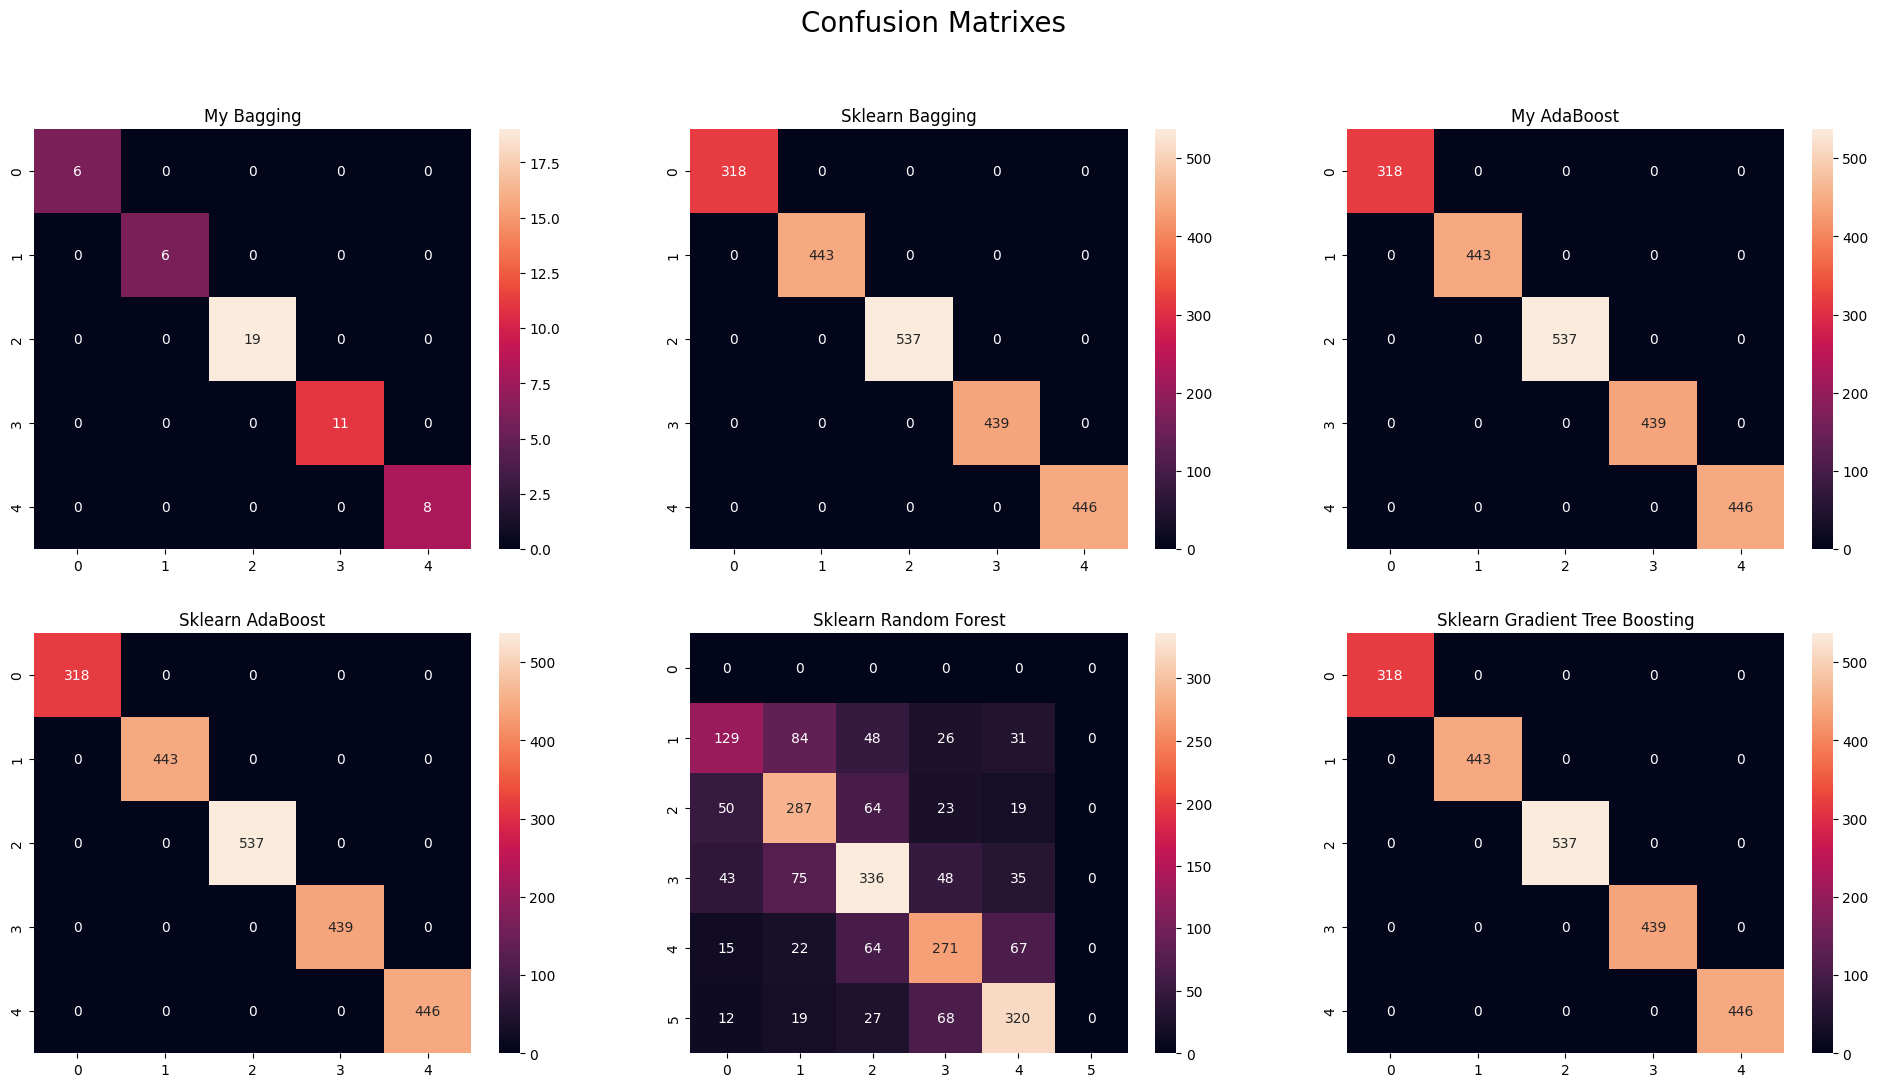

In [312]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize = 20)

plt.subplot(2, 3, 1)
plt.title("My Bagging")
sns.heatmap(confusion_matrix(np.resize(y_test, 50), np.resize(bagging_pred,50) ), annot=True, fmt="d")

plt.subplot(2, 3, 2)
plt.title("Sklearn Bagging")
sns.heatmap(confusion_matrix(y_test, sklearn_bagging_pred), annot = True, fmt = 'd')

plt.subplot(2, 3, 3)
plt.title("My AdaBoost")
sns.heatmap(confusion_matrix(y_test, adaboost_pred), annot = True, fmt = 'd')

plt.subplot(2, 3, 4)
plt.title("Sklearn AdaBoost")
sns.heatmap(confusion_matrix(y_test, sklearn_adaboost_pred), annot = True, fmt = 'd')

plt.subplot(2, 3, 5)
plt.title("Sklearn Random Forest")
sns.heatmap(confusion_matrix(y_test, sklearn_rf_pred), annot = True, fmt = 'd')

plt.subplot(2, 3, 6)
plt.title("Sklearn Gradient Tree Boosting")
sns.heatmap(confusion_matrix(y_test, sklearn_gb_pred), annot = True, fmt = 'd')

plt.show()

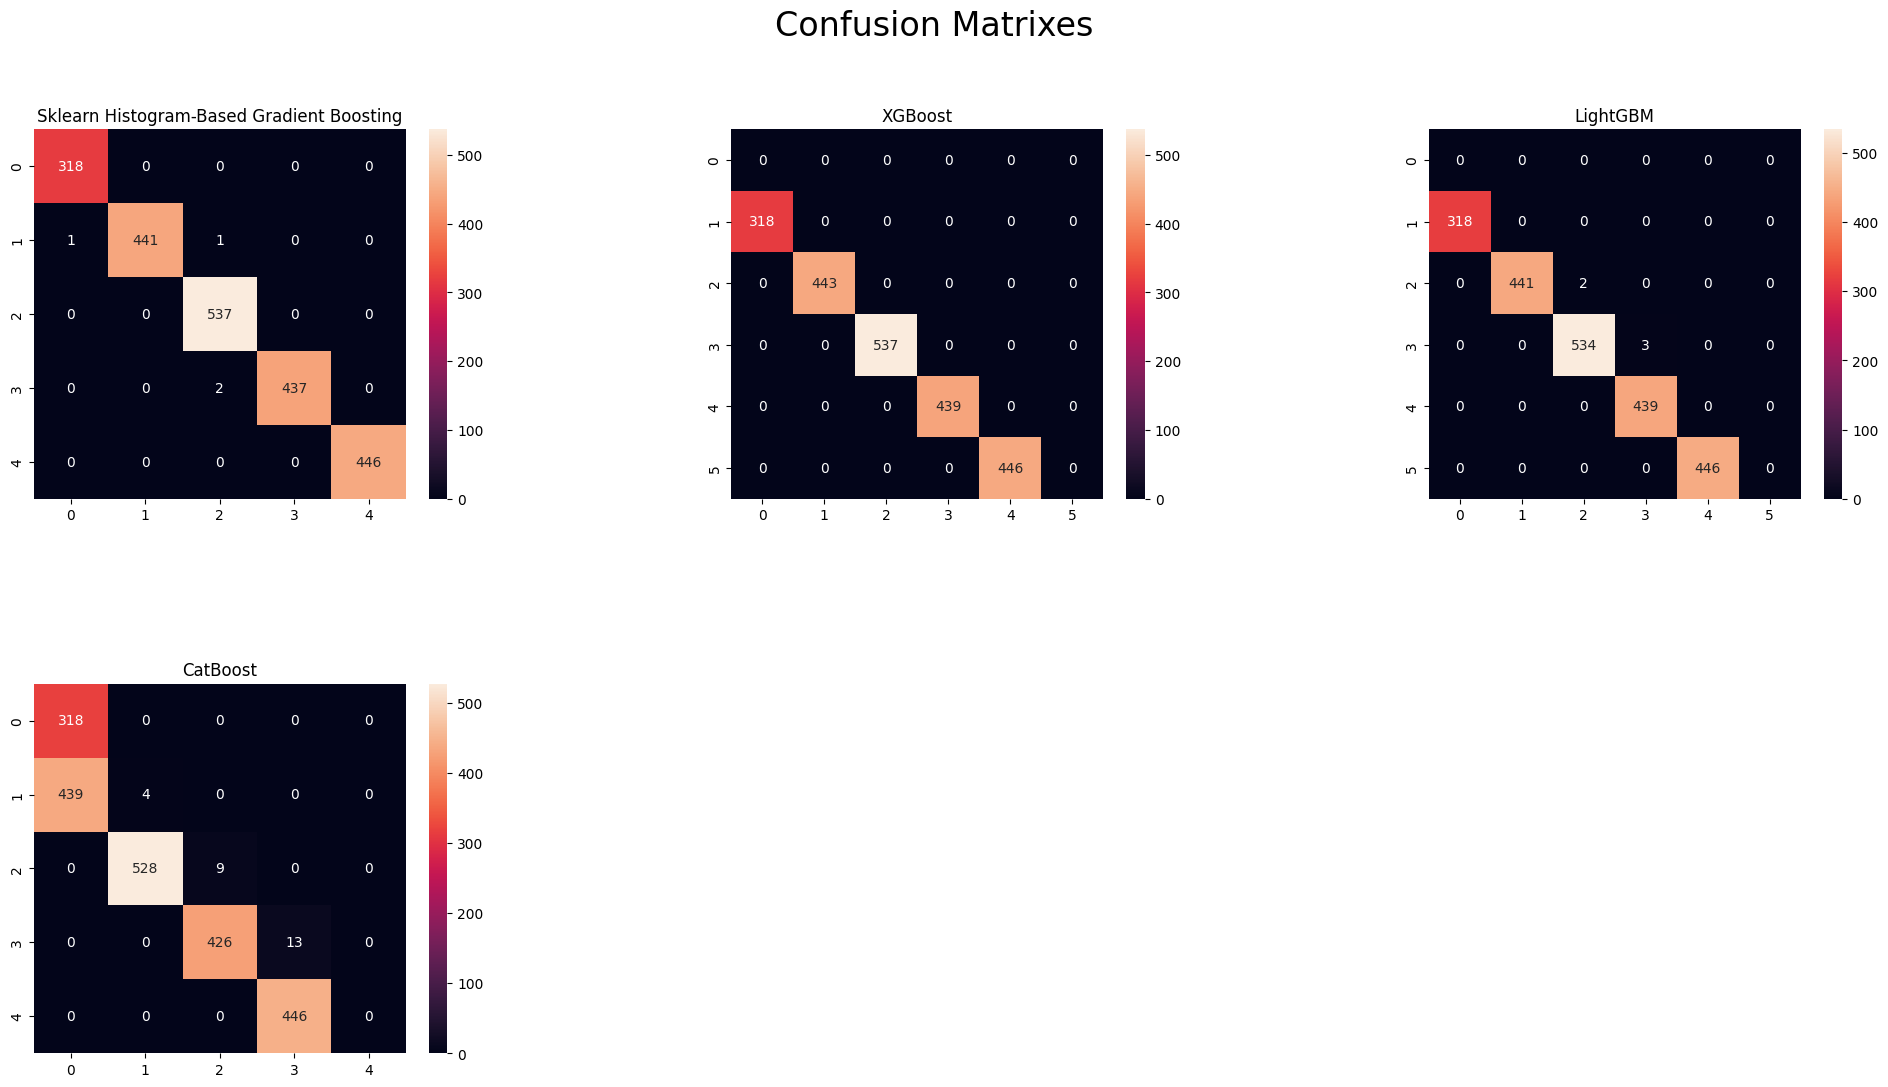

In [309]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize = 24)
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2, 3, 1)
plt.title("Sklearn Histogram-Based Gradient Boosting")
sns.heatmap(confusion_matrix(y_test, sklearn_hgb_pred), annot = True, fmt = 'd')

plt.subplot(2, 3, 2)
plt.title("XGBoost")
sns.heatmap(confusion_matrix(y_test, xgboost_pred), annot = True, fmt = 'd')

plt.subplot(2, 3, 3)
plt.title("LightGBM")
sns.heatmap(confusion_matrix(y_test, lightgbm_pred), annot = True, fmt = 'd')

plt.subplot(2, 3, 4)
plt.title("CatBoost")
sns.heatmap(confusion_matrix(y_test, catboost_pred), annot = True, fmt = 'd')

plt.show()